# Building purely with numpy

In [1]:
# Import
import numpy as np

In [22]:
# Define Constants
N, D_in, H, D_out = 1000, 1, 1, 1

In [23]:
# make input and output
x = np.random.randn(N, D_in)    # N, D_in
y = np.random.randn(N, D_out)   # N, D_out

# weights
w1 = np.random.randn(D_in, H)   # D_in, H
w2 = np.random.randn(H, D_out)  # H, D_out

lr = 1e-6

for t in range(1000):
    # Forward pass
    z1 = x.dot(w1)              # N, H
    a1 = np.maximum(z1, 0)      # N, H
    y_hat = a1.dot(w2)          # N, out
    
    # Compute loss
    loss = sum((y-y_hat) ** 2) / N # Scalar
    print("t = %d, loss = %.4f" %(t, loss.mean()))
    
    # Back propogation
    dy_hat = -2 * (y - y_hat)   # N, D_out
    dw2 = a1.T.dot(dy_hat) # H, D_out
    dz1 = np.maximum(z1, 0) * (dy_hat.dot(w2.T))
    dw1 = x.T.dot(dz1)
    
    # Update parameters
    w1 -= lr * dw1
    w2 -= lr * dw2
    
    

t = 0, loss = 0.9929
t = 1, loss = 0.9929
t = 2, loss = 0.9929
t = 3, loss = 0.9929
t = 4, loss = 0.9928
t = 5, loss = 0.9928
t = 6, loss = 0.9928
t = 7, loss = 0.9928
t = 8, loss = 0.9928
t = 9, loss = 0.9927
t = 10, loss = 0.9927
t = 11, loss = 0.9927
t = 12, loss = 0.9927
t = 13, loss = 0.9927
t = 14, loss = 0.9926
t = 15, loss = 0.9926
t = 16, loss = 0.9926
t = 17, loss = 0.9926
t = 18, loss = 0.9925
t = 19, loss = 0.9925
t = 20, loss = 0.9925
t = 21, loss = 0.9925
t = 22, loss = 0.9925
t = 23, loss = 0.9924
t = 24, loss = 0.9924
t = 25, loss = 0.9924
t = 26, loss = 0.9924
t = 27, loss = 0.9924
t = 28, loss = 0.9923
t = 29, loss = 0.9923
t = 30, loss = 0.9923
t = 31, loss = 0.9923
t = 32, loss = 0.9922
t = 33, loss = 0.9922
t = 34, loss = 0.9922
t = 35, loss = 0.9922
t = 36, loss = 0.9922
t = 37, loss = 0.9921
t = 38, loss = 0.9921
t = 39, loss = 0.9921
t = 40, loss = 0.9921
t = 41, loss = 0.9921
t = 42, loss = 0.9920
t = 43, loss = 0.9920
t = 44, loss = 0.9920
t = 45, loss = 0.992

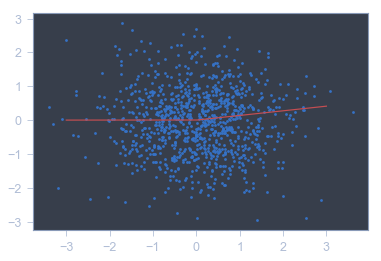

In [30]:
import matplotlib.pyplot as plt
plt.plot(x, y, ".")

def predict(x):
    return np.maximum(x.dot(w1), 0).dot(w2)

xs = np.linspace(-3, 3, 1000)
y_hats = np.array([])
for i in xs:
    y_hats = np.append(y_hats, predict(np.array(i)))
    
plt.plot(xs, y_hats, c="r")

# Using tensor

In [33]:
# -*- coding: utf-8 -*-

import torch


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 25900832.0
1 20092618.0
2 19134196.0
3 19858500.0
4 20393684.0
5 19145866.0
6 15929762.0
7 11552562.0
8 7544253.0
9 4598700.0
10 2764923.75
11 1701372.625
12 1106133.375
13 767969.8125
14 568527.5625
15 443830.5625
16 360344.0625
17 300720.1875
18 255666.96875
19 220152.984375
20 191256.03125
21 167222.265625
22 146958.890625
23 129688.046875
24 114842.609375
25 101986.515625
26 90807.484375
27 81017.7265625
28 72437.078125
29 64914.21875
30 58287.9453125
31 52433.19921875
32 47245.1328125
33 42640.23046875
34 38537.5234375
35 34880.515625
36 31611.712890625
37 28684.6484375
38 26059.9765625
39 23700.60546875
40 21578.87109375
41 19667.943359375
42 17944.03125
43 16386.046875
44 14975.7451171875
45 13699.6640625
46 12541.078125
47 11488.8076171875
48 10533.0283203125
49 9664.20703125
50 8873.0732421875
51 8151.7646484375
52 7494.07275390625
53 6893.20263671875
54 6344.15234375
55 5841.47802734375
56 5381.44384765625
57 4960.3037109375
58 4574.8408203125
59 4220.6552734375
60 3895.584

# Using Autograd

In [37]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 39103436.0
1 37456048.0
2 34975404.0
3 27675886.0
4 17754158.0
5 9705836.0
6 5116458.0
7 2918563.25
8 1893731.375
9 1374838.0
10 1074757.875
11 876999.8125
12 733421.8125
13 622588.1875
14 533807.0
15 461204.71875
16 400989.9375
17 350546.5
18 307908.46875
19 271648.78125
20 240644.78125
21 214002.796875
22 191055.515625
23 171152.515625
24 153741.875
25 138496.859375
26 125097.4453125
27 113292.1953125
28 102843.859375
29 93576.109375
30 85326.078125
31 77958.28125
32 71370.5234375
33 65448.64453125
34 60115.36328125
35 55303.734375
36 50952.078125
37 47008.640625
38 43425.4765625
39 40164.06640625
40 37191.9453125
41 34477.375
42 31996.390625
43 29723.353515625
44 27637.626953125
45 25724.1171875
46 23963.115234375
47 22341.4140625
48 20847.01171875
49 19466.640625
50 18192.46875
51 17013.359375
52 15921.3046875
53 14909.134765625
54 13969.052734375
55 13095.4892578125
56 12283.3115234375
57 11527.82421875
58 10824.1865234375
59 10168.78515625
60 9557.2939453125
61 8986.7578125
62 

In [38]:
# -*- coding: utf-8 -*-
import torch


class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # To apply our Function, we use Function.apply method. We alias this as 'relu'.
    relu = MyReLU.apply

    # Forward pass: compute predicted y using operations; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 26919408.0
1 22829352.0
2 21753088.0
3 20744348.0
4 18495040.0
5 14765780.0
6 10612472.0
7 7007161.0
8 4452887.0
9 2830481.0
10 1864226.375
11 1294176.625
12 951776.375
13 736684.875
14 593732.875
15 492739.375
16 417395.6875
17 358659.0625
18 311253.65625
19 272074.59375
20 239121.328125
21 211065.765625
22 186979.0
23 166165.15625
24 148085.25
25 132300.625
26 118468.75
27 106302.1796875
28 95574.40625
29 86078.765625
30 77656.671875
31 70171.0078125
32 63503.7109375
33 57549.5625
34 52220.76953125
35 47445.31640625
36 43155.58203125
37 39295.3984375
38 35818.05859375
39 32685.736328125
40 29855.408203125
41 27294.037109375
42 24973.166015625
43 22869.015625
44 20958.947265625
45 19222.578125
46 17642.1875
47 16202.8408203125
48 14891.4208984375
49 13693.7890625
50 12599.5966796875
51 11599.4853515625
52 10684.849609375
53 9847.193359375
54 9079.7978515625
55 8376.2734375
56 7731.31005859375
57 7139.1982421875
58 6595.31494140625
59 6095.37109375
60 5635.7333984375
61 5212.81054687